In [10]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import TimeSeriesSplit

In [4]:
series = read_csv('datasets/sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

### Train Test Split

In [7]:
# Train-test split
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2820
Training Observations: 1861
Testing Observations: 959


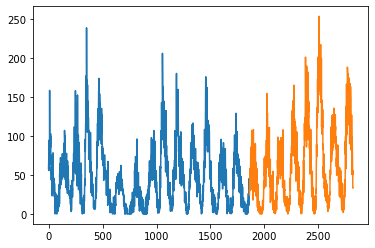

In [9]:
# Visualize train-test split
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

###  Multiple Train Test Splits
Test size remains same but train size varies by split iteration. 

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


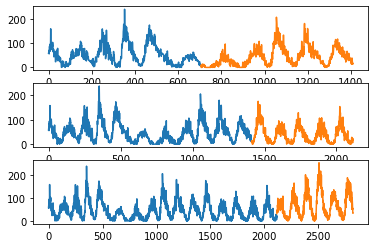

In [11]:
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

### Walk Forward Testing 
Also known as the Rolling Window Analysis or Rolling Forecast.
1. Starting at the beginning of the time series, the minimum number of samples in the window used to train a model.
1. The model makes a prediction for the next step.
1. The prediction is stored or evaluated against the known value.
1. The window is expanded to include the know value and the process is repeated.

In [15]:
# Train test split for walk forward testing using window size 500 and expanded window
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

train=1781, test=1
train=1782, test=1
train=1783, test=1
train=1784, test=1
train=1785, test=1
train=1786, test=1
train=1787, test=1
train=1788, test=1
train=1789, test=1
train=1790, test=1
train=1791, test=1
train=1792, test=1
train=1793, test=1
train=1794, test=1
train=1795, test=1
train=1796, test=1
train=1797, test=1
train=1798, test=1
train=1799, test=1
train=1800, test=1
train=1801, test=1
train=1802, test=1
train=1803, test=1
train=1804, test=1
train=1805, test=1
train=1806, test=1
train=1807, test=1
train=1808, test=1
train=1809, test=1
train=1810, test=1
train=1811, test=1
train=1812, test=1
train=1813, test=1
train=1814, test=1
train=1815, test=1
train=1816, test=1
train=1817, test=1
train=1818, test=1
train=1819, test=1
train=1820, test=1
train=1821, test=1
train=1822, test=1
train=1823, test=1
train=1824, test=1
train=1825, test=1
train=1826, test=1
train=1827, test=1
train=1828, test=1
train=1829, test=1
train=1830, test=1
train=1831, test=1
train=1832, test=1
train=1833, 

This has the benefit again of providing a much more robust estimation of how the chosen modeling method and parameters will perform in practice. This improved estimate comes at the computational cost of creating so many models. This is not expensive if the modeling method is simple or dataset is small (as in this example), but could be an issue at scale. In the above case, 2,820 models would be created and evaluated. As such, careful attention needs to be paid to the window width and window type (sliding or expanded). These could be adjusted to contrive a test harness on your problem that is significantly less computationally expensive. Walk-forward validation is the gold standard of model evaluation. 